In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
df_train=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
df_train


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [32]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [33]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [52]:
df_test = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [53]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [54]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [55]:
df_train['source']='df_train'
df_test['source']='df_test'
data = pd.concat([df_train,df_test],ignore_index=True)

In [56]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,df_train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,df_train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,df_train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,df_train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,df_train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,df_test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,df_test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,df_test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,df_test


Pre processing

In [57]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [58]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

In [59]:
pd.get_dummies(data["Outlet_Size"]).sum()

High      1553
Medium    4655
Small     3980
dtype: int64

In [60]:
pd.get_dummies(data["Outlet_Identifier"]).sum()

OUT010     925
OUT013    1553
OUT017    1543
OUT018    1546
OUT019     880
OUT027    1559
OUT035    1550
OUT045    1548
OUT046    1550
OUT049    1550
dtype: int64

In [61]:
pd.get_dummies(data["Outlet_Location_Type"]).sum()

Tier 1    3980
Tier 2    4641
Tier 3    5583
dtype: int64

In [62]:
pd.get_dummies(data["Outlet_Type"]).sum()

Grocery Store        1805
Supermarket Type1    9294
Supermarket Type2    1546
Supermarket Type3    1559
dtype: int64

In [63]:
pd.get_dummies(data["Item_Fat_Content"]).sum()

LF          522
Low Fat    8485
Regular    4824
low fat     178
reg         195
dtype: int64

Handling Null values

In [64]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [143]:
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')

Null_values = data['Item_Weight'].isnull()

data.loc[Null_values,'Item_Weight']  = data.loc[Null_values,'Item_Identifier'].apply(lambda x: item_avg_weight.at[x,'Item_Weight'])
data['Item_Weight'].isnull().sum()

0

In [144]:
data['Item_Weight'].astype(float)

0         9.30
1         5.92
2        17.50
3        19.20
4         8.93
         ...  
14199    10.50
14200     7.60
14201    10.00
14202    15.30
14203     9.50
Name: Item_Weight, Length: 14204, dtype: float64

In [145]:
from scipy.stats import mode
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x.astype('str')).mode[0]))
print (outlet_size_mode)
Null_values = data['Outlet_Size'].isnull() 
data.loc[Null_values,'Outlet_Size'] = data.loc[Null_values,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
data['Outlet_Size'].isnull().sum()

Outlet_Type  0  1  2  3
Outlet_Size  3  2  1  1


0

In [146]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
data['Item_Fat_Content'].value_counts()

0    9185
1    5019
Name: Item_Fat_Content, dtype: int64

In [147]:
pd.get_dummies(data["Item_Type"]).sum()

0     1086
1      416
2      186
3     1084
4     1136
5     1426
6     2013
7      362
8      858
9     1548
10     736
11     280
12      89
13    1989
14     726
15     269
dtype: int64

In [148]:
data.describe()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,0.353351,0.070034,7.229372,141.004977,1997.830681,1.518727,1.112856,1.201281,2181.288914
std,0.478027,0.048602,4.213471,62.086938,8.371664,0.773697,0.812755,0.796543,1706.499616
min,0.000000,0.003575,0.000000,31.290000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,0.000000,0.033143,4.000000,94.012000,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,0.000000,0.062347,6.000000,142.247000,1999.000000,2.000000,1.000000,1.000000,1794.331000
75%,1.000000,0.094037,10.000000,185.855600,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,1.000000,0.328391,15.000000,266.888400,2009.000000,3.000000,2.000000,3.000000,13086.964800


We can observe Item_visibility is 0 minimum. we have to perform formatting on Item visibility.

In [149]:
Item_visibility_mean = data['Item_Visibility'].mean()
data['Item_Visibility'].replace(0,Item_visibility_mean,inplace=True)

In [150]:
data.describe()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,0.353351,0.070034,7.229372,141.004977,1997.830681,1.518727,1.112856,1.201281,2181.288914
std,0.478027,0.048602,4.213471,62.086938,8.371664,0.773697,0.812755,0.796543,1706.499616
min,0.000000,0.003575,0.000000,31.290000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,0.000000,0.033143,4.000000,94.012000,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,0.000000,0.062347,6.000000,142.247000,1999.000000,2.000000,1.000000,1.000000,1794.331000
75%,1.000000,0.094037,10.000000,185.855600,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,1.000000,0.328391,15.000000,266.888400,2009.000000,3.000000,2.000000,3.000000,13086.964800


<AxesSubplot:>

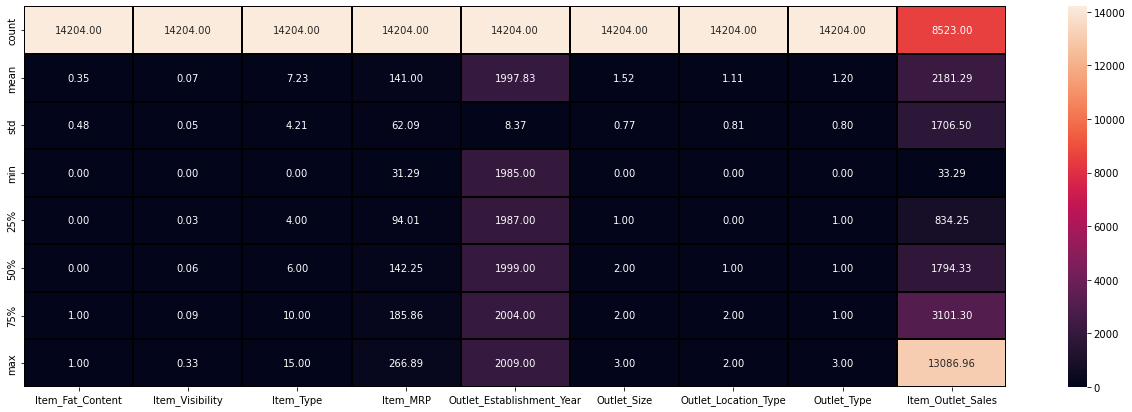

In [151]:
plt.figure(figsize=(22,7))
sns.heatmap(data.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

Correlation

In [152]:
data.corr()['Item_Outlet_Sales'].sort_values()

Outlet_Size                 -0.234537
Item_Visibility             -0.134141
Outlet_Establishment_Year   -0.049135
Item_Type                    0.017048
Item_Fat_Content             0.018719
Outlet_Location_Type         0.089367
Outlet_Type                  0.401522
Item_MRP                     0.567574
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

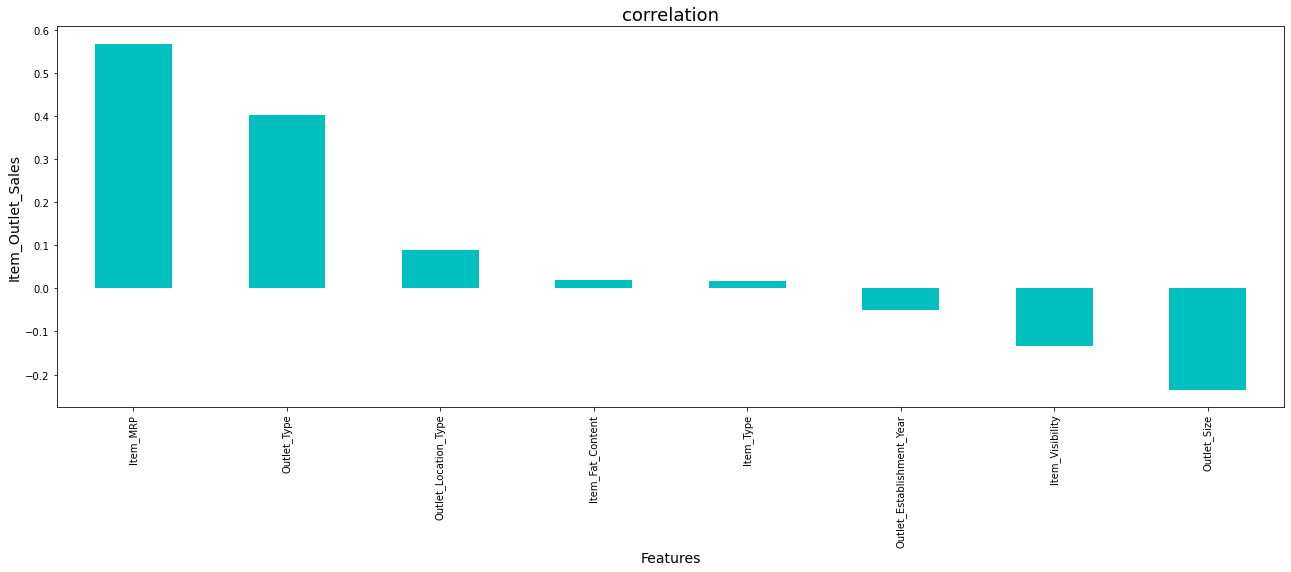

In [153]:
plt.figure(figsize=(22,7))
data.corr()['Item_Outlet_Sales'].sort_values(ascending=False).drop(['Item_Outlet_Sales']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Item_Outlet_Sales',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Outliers check

In [154]:
df['Item_Outlet_SalesItem_Outlet_Sales'].plot.box()

KeyError: 'Item_Outlet_SalesItem_Outlet_Sales'

<AxesSubplot:>

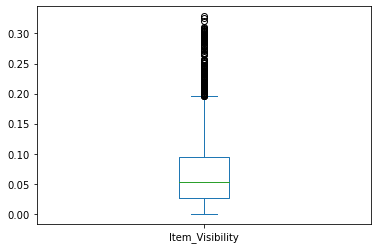

In [155]:
df['Item_Visibility'].plot.box()

<AxesSubplot:>

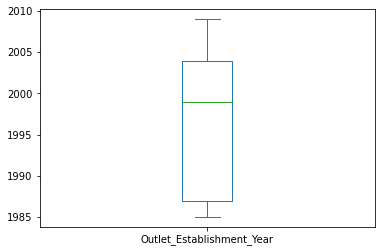

In [156]:
df['Outlet_Establishment_Year'].plot.box()

<AxesSubplot:>

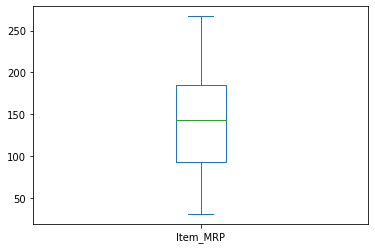

In [157]:
df['Item_MRP'].plot.box()

LabelEncoder

In [158]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [162]:
data.dtypes

Item_Identifier               object
Item_Weight                   object
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
source                        object
dtype: object

In [131]:
df["Item_Identifier"]=le.fit_transform(df["Item_Identifier"])
df["Item_Identifier"].value_counts()

1077    10
413     10
1542     9
301      9
35       9
        ..
1200     1
819      1
713      1
46       1
251      1
Name: Item_Identifier, Length: 1559, dtype: int64

In [163]:
df["Outlet_Identifier"]=le.fit_transform(df["Outlet_Identifier"])
df["Outlet_Identifier"].value_counts()

5    935
1    932
9    930
8    930
6    930
7    929
3    928
2    926
0    555
4    528
Name: Outlet_Identifier, dtype: int64

In [164]:
df["Item_Fat_Content"]=le.fit_transform(df["Item_Fat_Content"])
df["Item_Fat_Content"].value_counts()

1    5089
2    2889
0     316
4     117
3     112
Name: Item_Fat_Content, dtype: int64

Model building

In [166]:
train = data.loc[data['source']=='df_train']
test = data.loc[data['source']=='df_test']

In [167]:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

Linear Regression

In [175]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

x_train = train.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis=1)
y_train = train['Item_Outlet_Sales']
x_test = test.drop(['Item_Identifier','Outlet_Identifier'],axis=1).copy()

lr_model.fit(x_train,y_train)
lr_pred = lr_model.predict(x_test)
lr_accuracy = lr_model.score(x_train,y_train)*100

print(lr_accuracy)

50.340997934144504


In [176]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse','mae'],
             'max_features':['auto','sqrt','log2']}

rf =RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'sqrt'}
